In [ ]:
# This script contains the following:
# 1. Importing libraries and data
# 2. Data cleaning
# 3. Data prep for regression analysis
# 4. Regression analysis
# Bonus: performance improvement after removing outliers

In [ ]:
# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define path
path = r'C:\\Users\\nakarton\\Downloads\\NakartonDataFiles\\Life Expectancy 2000-2020'

In [3]:
path

'C:\\\\Users\\\\nakarton\\\\Downloads\\\\NakartonDataFiles\\\\Life Expectancy 2000-2020'

In [4]:
# Import dataset
df_life_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','life_expectancy_clean.csv'))

In [5]:
df_life_clean

,Unnamed: 0,Country,Year,Continent,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption,Population category
0,0,Albania,2000,Europe,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431,High Population
1,1,Albania,2001,Europe,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995,High Population
2,2,Albania,2002,Europe,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697,High Population
3,3,Albania,2003,Europe,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830,High Population
4,4,Albania,2004,Europe,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617,High Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,Zimbabwe,2011,Africa,52.896,12894323,0.884886,8.081738,8.400000,26.876148,67.016076,10.8,2.05000,High Population
1900,1900,Zimbabwe,2012,Africa,55.032,13115149,0.915735,6.918354,12.000000,26.533231,66.491185,11.1,2.07000,High Population
1901,1901,Zimbabwe,2013,Africa,56.897,13350378,0.919824,7.110148,15.500000,26.188786,65.966474,11.3,2.12000,High Population
1902,1902,Zimbabwe,2014,Africa,58.410,13586710,0.889104,8.133525,16.364740,25.832157,65.454108,11.6,2.23000,High Population


In [ ]:
# 2. Data cleaning

In [8]:
# Drop Columns
df_life_clean.drop(columns = ['Unnamed: 0'])

,Country,Year,Continent,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption,Population category
0,Albania,2000,Europe,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431,High Population
1,Albania,2001,Europe,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995,High Population
2,Albania,2002,Europe,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697,High Population
3,Albania,2003,Europe,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830,High Population
4,Albania,2004,Europe,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617,High Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Zimbabwe,2011,Africa,52.896,12894323,0.884886,8.081738,8.400000,26.876148,67.016076,10.8,2.05000,High Population
1900,Zimbabwe,2012,Africa,55.032,13115149,0.915735,6.918354,12.000000,26.533231,66.491185,11.1,2.07000,High Population
1901,Zimbabwe,2013,Africa,56.897,13350378,0.919824,7.110148,15.500000,26.188786,65.966474,11.3,2.12000,High Population
1902,Zimbabwe,2014,Africa,58.410,13586710,0.889104,8.133525,16.364740,25.832157,65.454108,11.6,2.23000,High Population


In [10]:
df_life_clean = df_life_clean.drop(columns = ['Unnamed: 0'])

In [11]:
df_life_clean.columns

Index(['Country', 'Year', 'Continent', 'life_expect', 'Population',
       'CO2_emiss', 'health_spend', 'internet_usage', 'open_defecation',
       'drinking_water_services', 'adult_obesity', 'beer_consumption',
       'Population category'],
      dtype='object')

In [12]:
df_life_clean.head(20)

,Country,Year,Continent,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption,Population category
0,Albania,2000,Europe,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431,High Population
1,Albania,2001,Europe,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995,High Population
2,Albania,2002,Europe,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697,High Population
3,Albania,2003,Europe,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830,High Population
4,Albania,2004,Europe,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617,High Population
5,Albania,2005,Europe,75.228,3011487,1.338209,6.335542,6.043891,0.623198,89.021188,15.6,1.65180,High Population
6,Albania,2006,Europe,75.423,2992547,1.339996,6.009277,9.609991,0.571935,89.519132,16.2,1.79330,High Population
7,Albania,2007,Europe,75.646,2970017,1.393931,6.316834,15.036115,0.521500,90.004187,16.9,1.94369,High Population
8,Albania,2008,Europe,75.912,2947314,1.384311,5.139062,23.860000,0.471903,90.476151,17.5,2.12835,High Population
9,Albania,2009,Europe,76.221,2927519,1.441494,4.602225,41.200000,0.423170,90.934413,18.1,2.20543,High Population


In [13]:
df_life_clean.shape

(1904, 13)

In [14]:
# Finding missing values
df_life_clean.isnull().sum()

Country                    0
Year                       0
Continent                  0
life_expect                0
Population                 0
CO2_emiss                  0
health_spend               0
internet_usage             0
open_defecation            0
drinking_water_services    0
adult_obesity              0
beer_consumption           0
Population category        0
dtype: int64

In [ ]:
# No missing values

C:\Users\nakarton\AppData\Local\Temp\ipykernel_14864\2288050922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_life_clean['life_expect'], bins=25)
C:\Users\nakarton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='life_expect', ylabel='Density'>

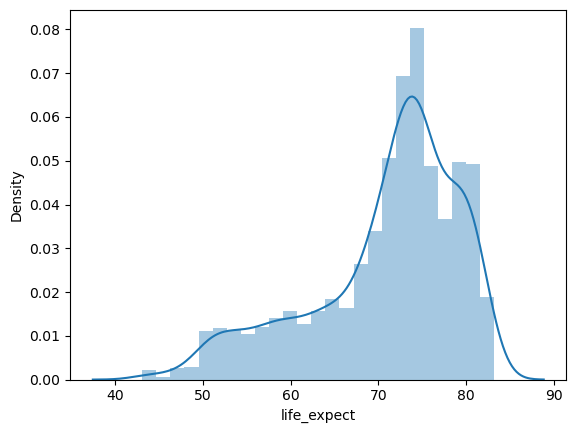

In [15]:
sns.distplot(df_life_clean['life_expect'], bins=25)

In [ ]:
# 3. Data prep for regression analysis

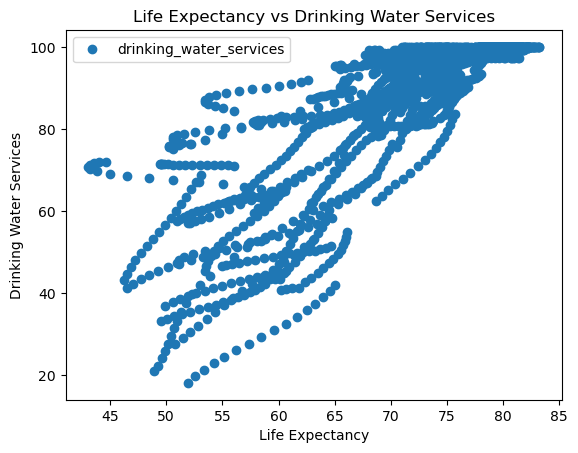

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df_life_clean.plot(x='life_expect', y='drinking_water_services', style='o')
plt.title('Life Expectancy vs Drinking Water Services')
plt.xlabel('Life Expectancy')
plt.ylabel('Drinking Water Services')
plt.show()


In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df_life_clean['life_expect'].values.reshape(-1,1)
y = df_life_clean['drinking_water_services'].values.reshape(-1,1)

In [22]:
X

array([[73.955],
       [74.288],
       [74.579],
       ...,
       [56.897],
       [58.41 ],
       [59.534]])

In [24]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 4. Regression analysis

In [25]:
# Create a regression object
regression = LinearRegression() 

In [26]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

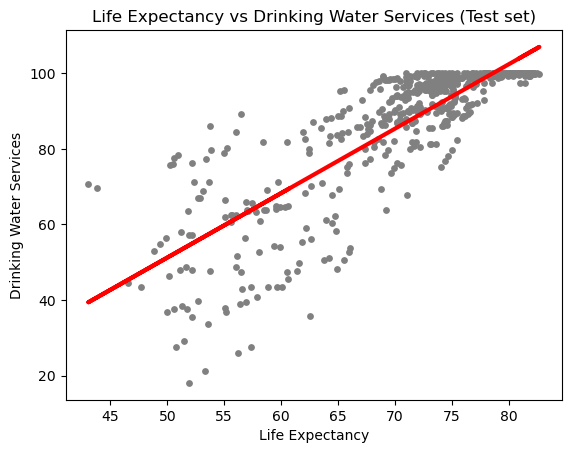

In [28]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Life Expectancy vs Drinking Water Services (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Drinking Water Services')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.70446926]]
Mean squared error:  93.45219706010384
R2 score:  0.6895099964379894


In [31]:
y_predicted

array([[104.00321895],
       [104.24433898],
       [ 89.72309235],
       [103.82030029],
       [101.10562121],
       [ 93.8125714 ],
       [ 95.72328144],
       [ 92.4905684 ],
       [ 78.43825868],
       [104.07804931],
       [ 72.69760621],
       [ 92.37911275],
       [ 78.19963298],
       [ 87.06245741],
       [ 89.79376546],
       [ 67.73419173],
       [ 78.41950952],
       [ 88.69209631],
       [ 90.02183176],
       [ 94.19266804],
       [106.14419863],
       [ 91.56096751],
       [ 80.54327821],
       [105.72015993],
       [ 92.92795185],
       [ 81.62220726],
       [ 75.39578105],
       [ 94.20289486],
       [101.08067775],
       [ 94.10898276],
       [ 92.21718817],
       [105.86982065],
       [ 91.9804748 ],
       [ 91.85243175],
       [ 80.80406201],
       [ 94.15886966],
       [ 55.19441139],
       [ 92.25468649],
       [104.06142034],
       [ 88.07703234],
       [ 85.12659605],
       [ 92.37125556],
       [ 94.6494658 ],
       [ 87

In [32]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,97.348920,104.003219
1,100.000000,104.244339
2,99.638450,89.723092
3,99.778148,103.820300
4,99.999997,101.105621
5,79.576510,93.812571
6,99.259171,95.723281
7,99.866587,92.490568
8,90.900302,78.438259
9,99.999998,104.078049


In [ ]:
# Compare how the regression fits the training set

In [33]:
# Predict
y_predicted_train = regression.predict(X_train)

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.70446926]]
Mean squared error:  102.01181647860972
R2 score:  0.674499248341718


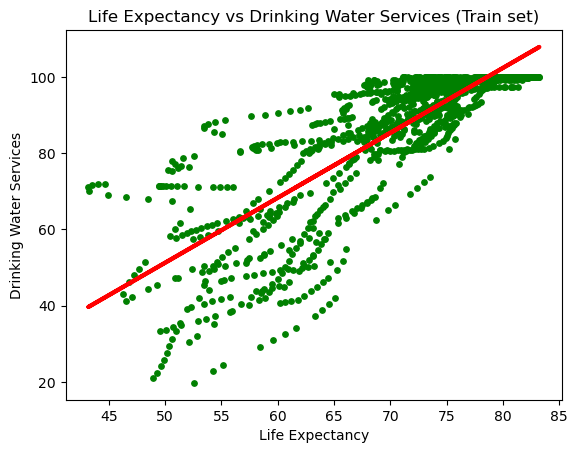

In [36]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Life Expectancy vs Drinking Water Services (Train set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Drinking Water Services')
plot_test.show()

In [ ]:
# Bonus: performance improvement after removing outliers

In [39]:
# Clean the extreme values from the \"Price per Unit\" variable observed during the consistency checks
df_life_clean_test = df_life_clean[df_life_clean['life_expect'] <=100]

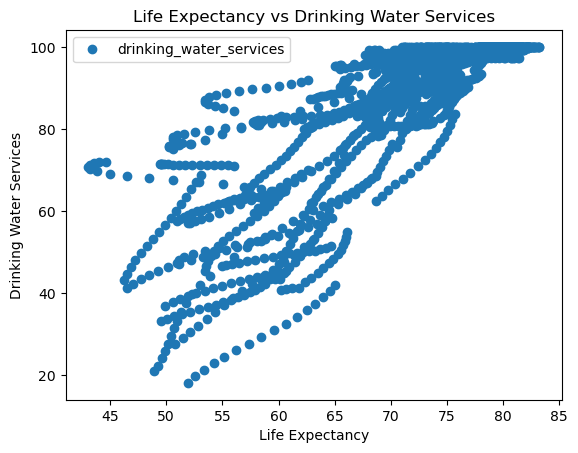

In [40]:
# See how the scatterplot looks without outliers
df_life_clean_test.plot(x = 'life_expect', y='drinking_water_services', style='o')
plt.title('Life Expectancy vs Drinking Water Services')
plt.xlabel('Life Expectancy')
plt.ylabel('Drinking Water Services')
plt.show()

In [42]:
# Reshape again
X_2 = df_life_clean_test['life_expect'].values.reshape(-1,1)
y_2 = df_life_clean_test['drinking_water_services'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.70446926]]
Mean squared error:  93.45219706010384
R2 score:  0.6895099964379894


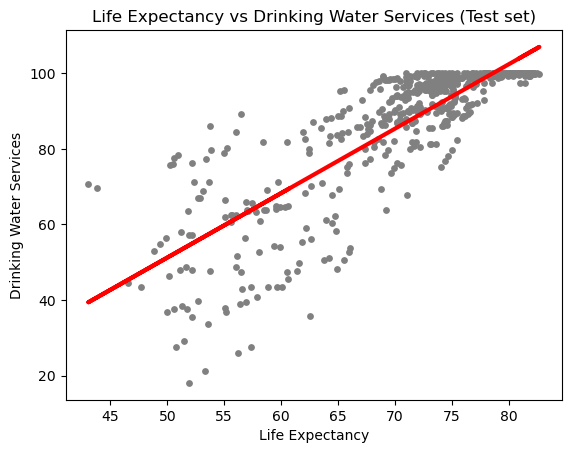

In [48]:
# Visualizing the test set results
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Life Expectancy vs Drinking Water Services (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Drinking Water Services')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,97.348920,104.003219
1,100.000000,104.244339
2,99.638450,89.723092
3,99.778148,103.820300
4,99.999997,101.105621
5,79.576510,93.812571
6,99.259171,95.723281
7,99.866587,92.490568
8,90.900302,78.438259
9,99.999998,104.078049
